In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [2]:
def setup():
    '''
    Authenticate
    Authenticates your credentials and creates a client.
    '''
    
    os.environ["VISION_ENDPOINT"] = "https://ailab4a.cognitiveservices.azure.com/" 
    #-> setx VISION_KEY your-key
    
    os.environ["VISION_KEY"] = "ae6fa7e20fec44ed8217bf1bb4b4cae0" 
    #-> setx VISION_ENDPOINT your-endpoint
    
    subscription_key = os.environ["VISION_KEY"]
    endpoint = os.environ["VISION_ENDPOINT"]
    computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
    return computervision_client
    '''
    END - Authenticate
    '''

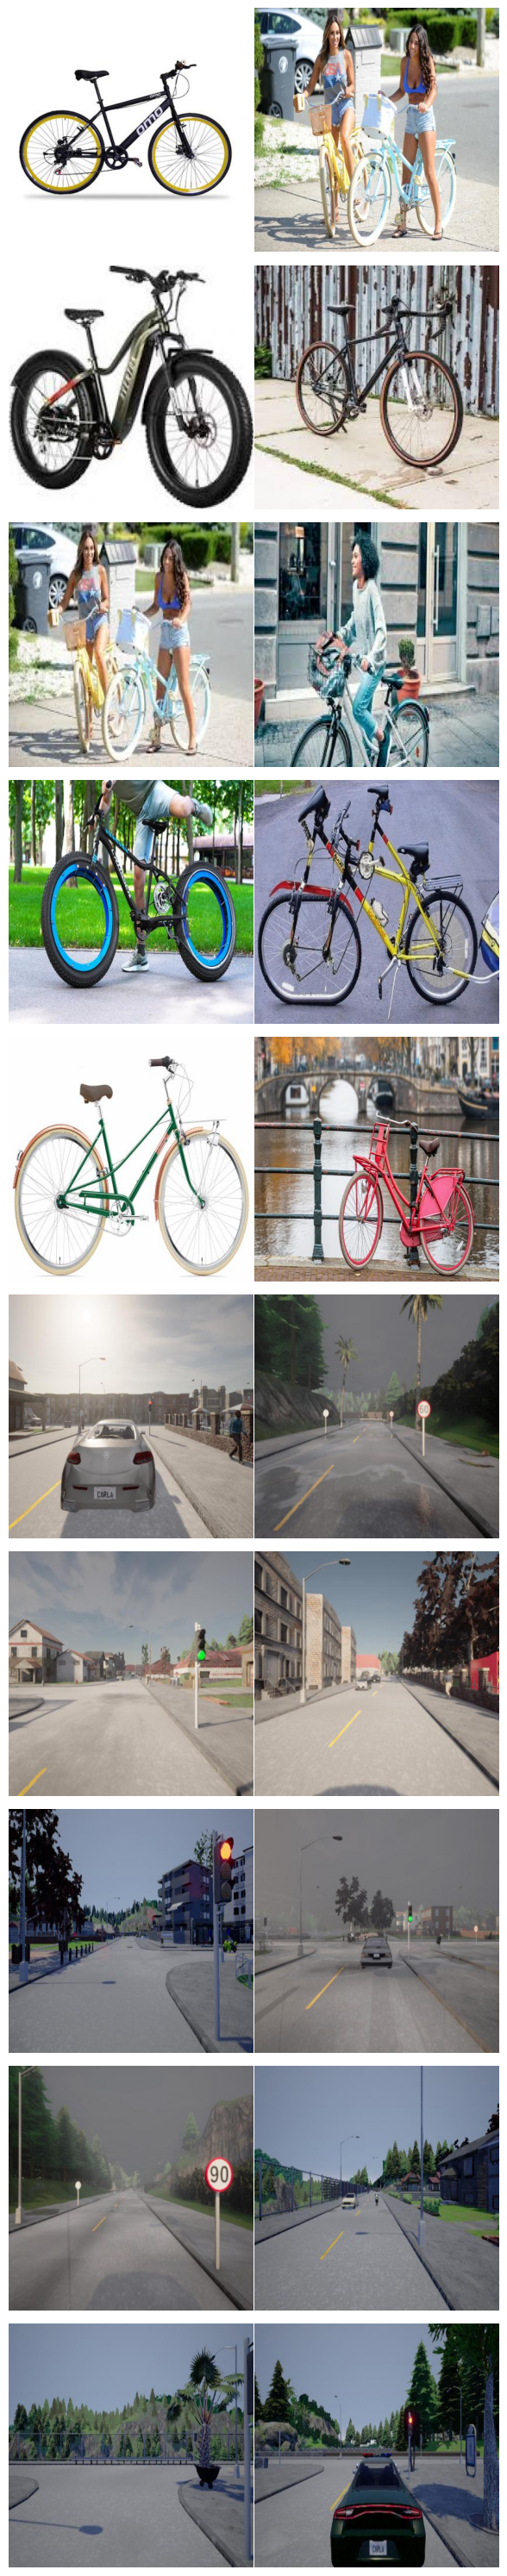

In [6]:
def citireImagini():
    import cv2
    import os
    import matplotlib.pyplot as plt
    
    director_imagini = "D:/FACULTATE/SEM4/AI/Lab4/bikes"
    imagini = []
    
    for nume_fisier in os.listdir(director_imagini):
        cale_fisier = os.path.join(director_imagini, nume_fisier)
        
        # Verificăm dacă fișierul este o imagine
        if os.path.isfile(cale_fisier) and any(cale_fisier.endswith(extensie) for extensie in [".jpg", ".jpeg", ".png"]):
            # Adăugăm calea către imagine în listă
            imagini.append(cale_fisier)

    nr_imagini = len(imagini)
    nr_randuri = nr_imagini // 2 + nr_imagini % 2
    
    nr_coloane = 2
    figsize_per_image = 3
    fig, axes = plt.subplots(nr_randuri, nr_coloane, figsize=(nr_coloane * figsize_per_image, nr_randuri * figsize_per_image))
    
    for ax, imagine_path in zip(axes.flatten(), imagini):
        img = cv2.imread(imagine_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis('off')
    
    # Afișăm imaginea
    plt.tight_layout()
    plt.show()

citireImagini()

In [15]:
# Sa se foloseasca un algoritm de clasificare a imaginilor (etapa de inferenta/testare) si sa se 
# stabileasca performanta acestui algoritm de clasificare binara (imagini cu biciclete vs. imagini fara biciclete).

In [21]:
def evalClassificationV1(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
    cm = confusion_matrix(realLabels, computedLabels, labels = labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 
    
def biciclete_in_imagini():
    import cv2
    import os
    import matplotlib.pyplot as plt
    from math import sqrt

    computervision_client = setup()
    ground_truth = ["bike","bike","bike","bike","bike","bike","bike","bike","bike","bike","no-bike","no-bike","no-bike","no-bike","no-bike","no-bike","no-bike","no-bike","no-bike","no-bike"]
    prediction = []
    
    director_imagini = "D:/FACULTATE/SEM4/AI/Lab4/bikes"
    imagini = []
    nr_imagini_cu_bicicleta = 0
    nr_imagini_fara_bicicleta = 0
    
    for nume_fisier in os.listdir(director_imagini):
        cale_fisier = os.path.join(director_imagini, nume_fisier)
        
        # Verificăm dacă fișierul este o imagine
        if os.path.isfile(cale_fisier) and any(cale_fisier.endswith(extensie) for extensie in [".jpg", ".jpeg", ".png"]):
            # Adăugăm calea către imagine în listă
            imagini.append(cale_fisier)

    for imagine_path in imagini:
        img = open(imagine_path, "rb")
        result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])
        
        print(f"Analizând imaginea: {imagine_path}")
        found_bicycle = False
        
        for ob in result.objects:
            if ob.object_property == "bicycle":
                predicted_bicycle_bb = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]
                found_bicycle = True
                break
       
        if found_bicycle:
            print("Bicicletă găsită în imagine.", predicted_bicycle_bb)
            nr_imagini_cu_bicicleta += 1  
            prediction.append("bike")
        else:
            print("Nu s-a găsit bicicletă în imagine.")
            nr_imagini_fara_bicicleta += 1
            prediction.append("no-bike")
            
    print()
    print("Total imagini biciclete prezise: ", nr_imagini_cu_bicicleta)
    print("Total imagini biciclete: ", 10)
    err = (sqrt((nr_imagini_cu_bicicleta - 10)**2))/2
    print("Eroare de: ", err)
    print()
    print("Total imagini fara biciclete prezise: ", nr_imagini_fara_bicicleta)
    print("Total imagini fara biciclete: ", 10)
    err = (sqrt((nr_imagini_fara_bicicleta - 10)**2))/2
    print("Eroare de: ", err)
    print()
    print("Ground truth:", ground_truth)
    print("Prediction: ", prediction)
    acc, prec, recall = evalClassificationV1(ground_truth, prediction, ['bike', 'no-bike'])
    #recall = true poz / (true poz + false neg)
    #precision = true poz / (true poz + false poz)
    print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)
    
biciclete_in_imagini()

Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike02.jpg
Bicicletă găsită în imagine. [9, 90, 366, 321]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike03.jpg
Bicicletă găsită în imagine. [155, 153, 338, 405]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike04.jpg
Bicicletă găsită în imagine. [0, 2, 414, 412]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike05.jpg
Bicicletă găsită în imagine. [66, 36, 349, 335]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike06.jpg
Nu s-a găsit bicicletă în imagine.
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike07.jpg
Bicicletă găsită în imagine. [51, 206, 308, 416]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike08.jpg
Nu s-a găsit bicicletă în imagine.
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike09.jpg
Bicicletă găsită în imagine. [4, 14, 371, 402]
Analizând imaginea: D:/FACULTATE/SEM4/AI/Lab4/bikes\bike1.jpg
Bicicletă găsită în imagine. [3, 16, 412, 410]
Analizând imaginea: D:/FACULTA